<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/LEZ13_KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import json
import os
%pylab inline

pl.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
cd gdrive/My\ Drive/MLPNS

/content/gdrive/My Drive/MLPNS


In [4]:
!pip install kaggle

In [5]:
!ls kaggle.json

kaggle.json


In [6]:
!chmod 600 kaggle.json

In [7]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [8]:
!kaggle datasets list -s stroke

ref                                                            title                                            size  lastUpdated          downloadCount  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
fedesoriano/stroke-prediction-dataset                          Stroke Prediction Dataset                        67KB  2021-01-26 19:29:28          25733  
mazharkarimi/heart-disease-and-stroke-prevention               Heart Disease and Stroke Prevention               1MB  2018-05-14 10:36:48           7728  
google/tinyquickdraw                                           QuickDraw Sketches                               11GB  2018-04-18 19:38:04           3016  
valkling/tappy-keystroke-data-with-parkinsons-patients         Tappy Keystroke Data with Parkinson's Patients   96MB  2018-02-04 05:41:47           1024  
lirilkumaramal/heart-stroke                                    Heart S

In [9]:
!kaggle datasets download fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip stroke-prediction-dataset

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: healthcare-dataset-stroke-data.csv  


In [11]:
datain = pd.read_csv('healthcare-dataset-stroke-data.csv')
datain.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
datain.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
#voglio vedere che tipo di dati ho
datain.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

i dati andranno ripuliti...

l'ID non ci interessa

bisogna stare attenti alle variabili binarie

In [14]:
dataClean = datain[['age','hypertension','avg_glucose_level','bmi']]
dataClean

,age,hypertension,avg_glucose_level,bmi
0,67.0,0,228.69,36.6
1,61.0,0,202.21,NaN
2,80.0,0,105.92,32.5
3,49.0,0,171.23,34.4
4,79.0,1,174.12,24.0
...,...,...,...,...
5105,80.0,1,83.75,NaN
5106,81.0,0,125.20,40.0
5107,35.0,0,82.99,30.6
5108,51.0,0,166.29,25.6


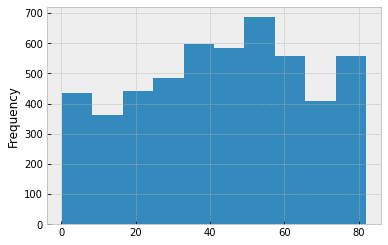

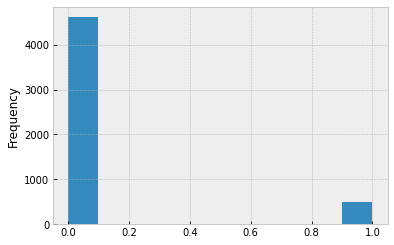

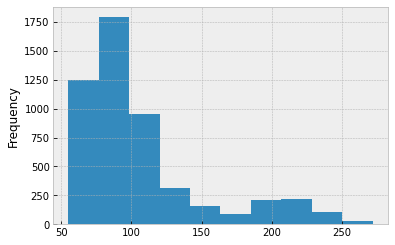

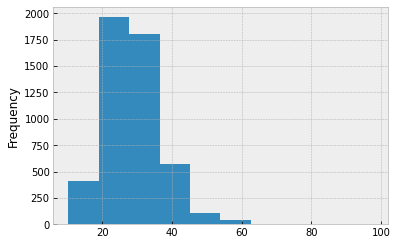

In [15]:
#vediamo come sono distribuite le nostre variabili
for s in dataClean.columns:
  pl.figure()
  dataClean[s].plot(kind='hist')

In [16]:
#correlation matrix
dataClean.corr()

,age,hypertension,avg_glucose_level,bmi
age,1.000000,0.276398,0.238171,0.333398
hypertension,0.276398,1.000000,0.174474,0.167811
avg_glucose_level,0.238171,0.174474,1.000000,0.175502
bmi,0.333398,0.167811,0.175502,1.000000


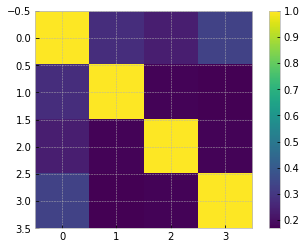

In [17]:
pl.imshow(dataClean.corr())
pl.colorbar()
#la matrice di correlazione è tutta positiva, 
#se così non fosse usare una color scale divergente con lo 0 neutro

In [18]:
#il nostro modello potrebbe avere NaN
# SK_learn non funziona con NaN!!!
# possiamo rimuovere l'osservazione o la variabile 
#in questo caso conviene eliminare l'osservazione 
# ma è necessario valutare la percentuale di variabili eliminate
#tuttavia KNN può riempiere le caselle occupate da NaN

#vediamo cosa succede non eliminando i NaN

In [19]:
from sklearn.model_selection import train_test_split

L'aver avuto o meno un heart stroke sarà il dato di input

controlliamo i dati

si osserva che sono ordinati... durante lo split è necessario 'disordinarli'


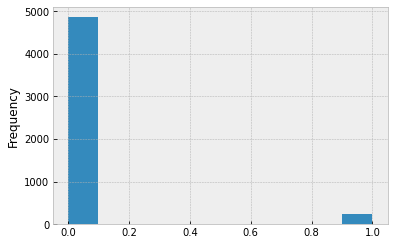

In [20]:
datain.stroke.plot(kind='hist')

in qeusto caso potrebbero esserci una discrepanza troppo elevata ...ci sono troppi valori = 0 e pochi = 1

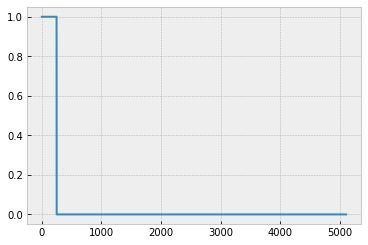

In [21]:
datain.stroke.plot()

In [22]:
#facciamo lo split in train set and test set
X_train, X_test, y_train, y_test = train_test_split(dataClean, 
                    datain.stroke, test_size=0.2, shuffle=True, random_state=1)
X_train.shape, y_train.shape

((4088, 4), (4088,))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# si crea il classificatore, decidendo quanti primi vicini valutare 
# 3 in questo caso non ha un particolare motivo
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train, y_train)

ValueError: ignored

errore: ci sono dei NaNs 

#dobbiamo ripulire i dati dai Nan

In [24]:
#bisogna valutare se eliminare l'osservazione o la variabile
# si decide in base alla significatività della variabile 
#o alla percentuale di osservazioni eliminate

datain.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

ho 201 NaN e sono tutti sulla variabile bmi

dunque normalmente si potrebbe eliminare la variabile ma nel nostro caso ridurrebbe troppo il feature space, rimuoveremo le osservazioni

In [25]:
dataClean = dataClean.dropna(subset=['bmi'], axis=0)
dataClean.isna().sum()

age                  0
hypertension         0
avg_glucose_level    0
bmi                  0
dtype: int64

In [26]:
dataClean.shape

(4909, 4)

In [27]:
#devo farlo su tutti i dati 
target = datain[["bmi","stroke"]].dropna(subset=["bmi"], axis=0).stroke

In [28]:
#facciamo lo split in train set and test set
X_train, X_test, y_train, y_test = train_test_split(dataClean, 
                   target, test_size=0.2, shuffle=True, random_state=1)
X_train.shape, y_train.shape

((3927, 4), (3927,))

## algoritmo fatto a mano

per vedere i concetti di base definendo distanza ecc

In [29]:
X_train.iloc[0] #primo oggetto del training set
#calcoliamo i primi vicini del primo oggetto a mano

age                   38.00
hypertension           0.00
avg_glucose_level    151.26
bmi                   20.60
Name: 4412, dtype: float64

In [30]:
import scipy as sp

In [31]:
import pylab as pl

In [33]:
print("lost in cleaning: %.2f of the data"%(1 - dataClean.shape[0] / datain.shape[0]))

lost in cleaning: 0.04 of the data


In [34]:
#standardizzo i dati
import sklearn.preprocessing
Xscaled = sklearn.preprocessing.scale(X_train, axis=0)

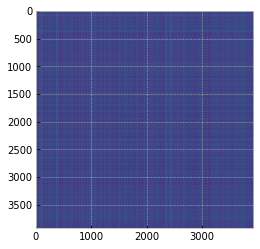

In [35]:
pl.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xscaled)))
# pdist fornisce la distanza per ogni coppia di oggetti in 
# una matrice triangolare inferiore
# squareform la trasofrma in una matrice quadrata e quindi in un array con 
# tutte le distanze a coppie

In [38]:
# mi serve la prima riga: cioè la distanza tra il pirmo oggetto e tutti gli altri
firstRaw = sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xscaled))[0]
firstRaw.shape

(3927,)

In [39]:
np.argsort(firstRaw) # riordino i valori nell'array
# mi indica in che ordine sono distanti gli oggetti

array([   0, 1902, 2564, ...,  420,  931,   99])

In [40]:
# per vedere la distanza uso:
firstRaw[np.argsort(firstRaw)]

array([ 0.        ,  0.34004583,  0.35266319, ...,  6.70151299,
        8.33000641, 10.66323764])

Text(0, 0.5, 'distance')

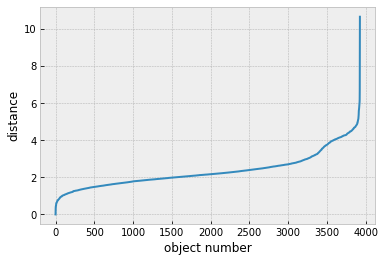

In [42]:
pl.plot(firstRaw[np.argsort(firstRaw)])
pl.xlabel('object number')
pl.ylabel('distance')

molto interessante: questo plot indica la presenza di pochi oggetti molto vicini, una lunga transizione e molti oggetti molto più 'lontani'

In [45]:
target.iloc[np.argsort(firstRaw)][1:4].mode()[0]
#mode indica la categoria più popolare come una serie, 
#[0] indica il primo elemento, cioè quello che mi interessa

2007    0
2689    0
1055    0
Name: stroke, dtype: int64

In [46]:
target.iloc[np.argsort(firstRaw)][:4]
# non ha funzionato: il mio target aveva uno come stroke

0       1
2007    0
2689    0
1055    0
Name: stroke, dtype: int64

In [50]:
# rifacciamo il preprocessing ecc
Xscaled = sklearn.preprocessing.scale(dataClean, axis=0)

In [51]:

#facciamo lo split in train set and test set
X_train, X_test, y_train, y_test = train_test_split(Xscaled, 
                   target, test_size=0.2, shuffle=True, random_state=1)
X_train.shape, y_train.shape


((3927, 4), (3927,))

In [52]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

l'array è dominato da 0

In [56]:
print ("prediction score %.2f"%knn.score(X_train, y_train))

prediction score 0.96


In [55]:
print ("prediction score %.2f"%knn.score(X_test, y_test))
# knn.score mi da l'accuratezza... quanti ne ho predetti correttamente

prediction score 0.94


se c'è un degradazione evidente dell'accuratezza la causa è quasi sicuramente overfitting/overtraining c'è differenza... dipende dal modello

il modello impara carattteristiche peculiari del training set e non può essere generalizzato

In [58]:
# cross validation

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, Xscaled, target, cv=5)


print (" CV average prediction score %.2f"%cv_scores.mean())

 CV average prediction score 0.95


In [59]:
# per determinare la miglior combinazione di hyper parameters


from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(Xscaled, target)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
#mi dice il miglior irsultato nel range
print ("prediction score %.2f"%knn_gscv.score(X_test, y_test))

prediction score 0.95


In [61]:
# confusion metrix è :
# diagonale principale = numero di predizioni corretee
# off diagonal = numero di predizioni sbagliate

sklearn.metrics.confusion_matrix(y_test, knn_gscv.predict(X_test))


array([[931,   0],
       [ 51,   0]])

In [62]:
(knn_gscv.predict(X_train) == 0).sum() / X_train.shape[0]

1.0

il modello è inutile: lo sbilanciamento delle input variables che propende per lo zero non ne permette il corretto funzionamento.

Il modello ha solo imparato che stroke=0 è più probabile come risultato che stroke = 1.

Non è ciò che volevamo: i 931 corretti si riferiscono all'aver indovinato stroke = 0...


# la soluzione sarebbe ribilanciare gli input data... tuttavia non si poò fare con tutti i modelli se ciò riduce molto il numero di osservazioni .. con questo modello si potrebbe fare